<a href="https://colab.research.google.com/github/JefoGao/Resource_NLP-in-Python/blob/main/Chapter03/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab2

In this lab, we are going to learn about NLTK, Spacy and some visualization techniques, let's begin.

# NLTK

NLTK is one of the major NLP packages in Python. It is targeted at learners rather than being a production library which makes a good starting point for our purposes.

The first step is to import nltk then make sure that all the necessary files are downloaded.

In [1]:
import nltk
nltk.download("all", quiet=True)

True

If you are running on your personal machine (not within Google colab), you only need to do this once. 

NLTK offers a special module called "book" which can be imported using ```from nltk.book import *``` 

After printing a welcome message, it loads the text of several books (this will take a few seconds).

In [2]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


This module contains a number of Corpora that are ready to practice on. The Corpora are named: *text1* - *text9*

In [3]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [4]:
text2

<Text: Sense and Sensibility by Jane Austen 1811>

##  Searching Text
There are many ways to examine the context of a text apart from simply reading it. **A concordance view shows us every occurrence of a given word, together with some context**.

In [5]:
text1.concordance("true")

Displaying 25 of 87 matches:
word , you deliver that which is not true ." -- HACKLUYT " WHALE . ... Sw . an
 foam ." -- TOOKE ' S LUCIAN . " THE TRUE HISTORY ." " He visited this country
 " is not only better armed than the True Whale " ( Greenland or Right Whale )
oft there to the royal mast - head . True , they rather order me about some , 
e wight Death is the only glazier ." True enough , thought I , as this passage
o which he pours his poison . Though true cylinders without -- within , the vi
ry about selling his head , which if true I take to be good evidence that this
 New England . It is a land of oil , true enough : but not like Canaan ; a lan
y call my shadow here on earth is my true substance . Methinks that in looking
y temple . And here , shipmates , is true and faithful repentance ; not clamor
nted pilot - prophet , or speaker of true things , and bidden by the Lord to s
honour ! Woe to him who would not be true , even though to be false were salva
hing as that . But , pe

Try it yourself. Let's find more about the words: ["often", "test", "extreme"] in text2

In [6]:
# Your code goes here
text2.concordance("often")

Displaying 25 of 52 matches:
ink , be in doubt , who has seen him often enough to engage him in unreserved c
ealed only by that shyness which too often keeps him silent . You know enough o
ties of our friends as I hope to see often collected here ; and I have some tho
 who are sportsmen likewise , is not often desirous of encouraging their taste 
 water were made and accomplished as often as a showery October would allow . I
 the house ? Is not it what you have often wished to do yourself ?" " Yes , Mar
hose fine bold hills that we have so often admired . I did not see it to advant
hardly be equal , and he had himself often complained of his poverty . But for 
 how well she understood him . " How often did I wish ," added he , " when I wa
ately singing and crying ; her voice often totally suspended by her tears . In 
er , Elinor ," said she , " how very often Sir John fetches our letters himself
unaccountable coldness which she had often observed at Norland in their mutual 
leaves ." "

In [7]:
text2.concordance("test")

Displaying 1 of 1 matches:
 , " has been pretty well put to the test , by our long , very long absence si


In [8]:
text2.concordance("extreme")

Displaying 4 of 4 matches:
n another day or two perhaps ; this extreme mildness can hardly last longer -- 
ng her that he was kept away by the extreme affection for herself , which he co
 of his brother , and lamenting the extreme GAUCHERIE which he really believed 
y which had been leading her to the extreme of languid indolence and selfish re


A concordance permits us to see words in context. For example, we saw that monstrous occurred in contexts such as the \_\_\_ pictures and a \_\_\_ size . 

What other words appear in a similar range of contexts? We can find out by appending the term similar to the name of the text in question, then inserting the relevant word in parentheses:

In [9]:
text1.similar("monstrous")

true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless


In [10]:
text2.similar("monstrous")

very so exceedingly heartily a as good great extremely remarkably
sweet vast amazingly


Observe that we get different results for different texts. Austen uses this word quite differently from Melville; for her, monstrous has positive connotations, and sometimes functions as an intensifier like the word very.

The method ```common_contexts``` allows us to examine just the contexts that are shared by two or more words, such as monstrous and very. 

In [17]:
text2.common_contexts(["monstrous", "very"])

am_glad a_pretty a_lucky is_pretty be_glad


Your Turn: pick another pair of words and compare their usage in two different texts, using the ```similar()``` and ```common_contexts()``` functions.


In [18]:
text1.similar("benevolent")

all out long allusions sung many thou wine one full eyes much sunrise
also some king sixty man progress gills


In [19]:
# Your code goes here

# find the common contexts in which the words: great and dangerous are used in text1
text1.common_contexts(["great", "dangerous"])

# find the common contexts in which the words: benevolent and fish are used in text1
text1.common_contexts(["benevolent", "fish"])

a_man
No common contexts were found


It is one thing to automatically detect that a particular word occurs in a text, and to display some words that appear in the same context. 

However, we can also determine the location of a word in the text: how many words from the beginning it appears. This positional information can be displayed using a dispersion plot. Each stripe represents an instance of a word, and each row represents the entire text.

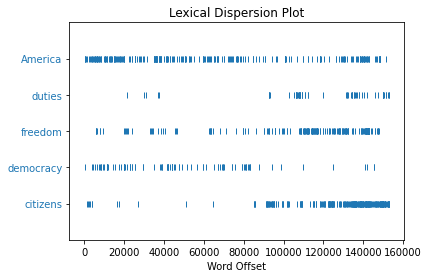

In [15]:
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])

Try more words (e.g., liberty, constitution), and different texts. 

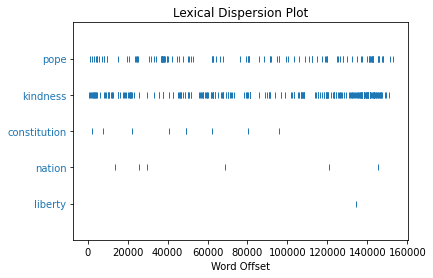

In [16]:
# Your code goes here
text4.dispersion_plot(["liberty", "nation", "constitution", "kindness", "pope"])


For these plots to work, it is assumed that ```numpy``` and ```matplotlib``` are installed.



##   Counting Vocabulary
The most obvious fact about texts that emerges from the preceding examples is that they differ in the vocabulary they use. 

Let's begin by finding out the length of a text from start to finish, in terms of the words and punctuation symbols that appear. 

Let's find the number of words in the book of Genensis:

In [20]:
len(text3)

44764

So Genesis has 44,764 words and punctuation symbols, or "tokens." 

This includes duplicate tokens. To find the number of unique words, we use the ```set``` data structure as follows:

In [26]:
print(list(set(text3))[:10]) # limit the output to be 10

['weep', 'Matred', 'Ludim', 'Jared', 'here', 'hunting', 'earth', 'Jabbok', 'provide', 'kissed']


and to get a sorted set, we use the Python ```sorted()``` function:

In [27]:
print(list(sorted(set(text3)))[:10]) # limit the output to be 10

['!', "'", '(', ')', ',', ',)', '.', '.)', ':', ';']


In [28]:
len(set(text3))

2789

Although it has 44,764 tokens, this book has only 2,789 distinct words, or "word types." 

Now, let's calculate a measure of the lexical richness of the text. The next example shows us that the number of distinct words is just 6% of the total number of words, or equivalently that each word is used 16 times on average


In [29]:
len(set(text3)) / len(text3)

0.06230453042623537

In [30]:
len(text3)/len(set(text3)) 

16.050197203298673

Next, let's focus on particular words. We can count how often a word occurs in a text, and compute what percentage of the text is taken up by a specific word:

In [31]:
text3.count("smote")

5

In [32]:
100 * text4.count("a") / len(text4) # the percentage of "a" in the total number of words

1.457806031353621

Your Turn: How many times does the word *lol* appear in text5? How much is this as a percentage of the total number of words in this text?


In [33]:
# Your code goes here
100 * text5.count("lol") / len(text5)

1.5640968673628082

To simplify things, let's create a functions for calculating lexical diversity

In [34]:
def lexical_diversity(text):
  return len(set(text)) / len(text)

def percentage(count, total):
  return 100 * count / total

We can go ahead and use these functions, let's find the number of tokens, the number of types, the lexical diversity for for the for the following:

In [35]:
from nltk.corpus import brown

print(f"The type of brown is: {type(brown)}")

len(brown.words()), len(set(brown.words())), lexical_diversity(brown.words())

The type of brown is: <class 'nltk.corpus.util.LazyCorpusLoader'>


(1161192, 56057, 0.048275392872152066)

In [39]:
brown.paras()[:2] # first 2 paragraphs

[[['The',
   'Fulton',
   'County',
   'Grand',
   'Jury',
   'said',
   'Friday',
   'an',
   'investigation',
   'of',
   "Atlanta's",
   'recent',
   'primary',
   'election',
   'produced',
   '``',
   'no',
   'evidence',
   "''",
   'that',
   'any',
   'irregularities',
   'took',
   'place',
   '.']],
 [['The',
   'jury',
   'further',
   'said',
   'in',
   'term-end',
   'presentments',
   'that',
   'the',
   'City',
   'Executive',
   'Committee',
   ',',
   'which',
   'had',
   'over-all',
   'charge',
   'of',
   'the',
   'election',
   ',',
   '``',
   'deserves',
   'the',
   'praise',
   'and',
   'thanks',
   'of',
   'the',
   'City',
   'of',
   'Atlanta',
   "''",
   'for',
   'the',
   'manner',
   'in',
   'which',
   'the',
   'election',
   'was',
   'conducted',
   '.']]]

In [40]:
print(brown.raw()[:10])
print(brown.words()[:10])
print(brown.sents()[:2])
print(brown.paras()[:2])



	The/at 
['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of']
[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.']]
[[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.']], [['The', 'jury', 'further', 'said', 'in', 'term-en



##  Computing with Language: Simple Statistics
Now, we pick up the question of what makes a text distinct, and use automatic methods to find characteristic words and expressions of a text.

### Frequency Distributions
How can we automatically identify the words of a text that are most informative about the topic and genre of the text? 

Imagine how you might go about finding the 50 most frequent words of a book.

Since we often need frequency distributions in language processing, NLTK provides built-in support for them. Let's use a ```FreqDist()``` to find the 50 most frequent words of Moby Dick:

In [41]:
fdist1 = FreqDist(text1) 
print(fdist1) 

<FreqDist with 19317 samples and 260819 outcomes>


In [42]:
fdist1.most_common(10)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982)]

To find the frequency of a particular word, you can can access it using the word string as index, the output of FreqDist is a dictionary.

In [43]:
fdist1['whale']

906

Your Turn: What are the top 20 tokens in text2. 

In [44]:
# Your code goes here
fdist2 = FreqDist(text2)
fdist2.most_common(20)

[(',', 9397),
 ('to', 4063),
 ('.', 3975),
 ('the', 3861),
 ('of', 3565),
 ('and', 3350),
 ('her', 2436),
 ('a', 2043),
 ('I', 2004),
 ('in', 1904),
 ('was', 1846),
 ('it', 1568),
 ('"', 1506),
 (';', 1419),
 ('she', 1333),
 ('be', 1305),
 ('that', 1297),
 ('for', 1234),
 ('not', 1212),
 ('as', 1179)]

Remember, we have calculated the frequencies in Lab 1 in pure Python.

Let's return to our task of finding words that characterize a text. 

Notice that the long words in *text4* reflect its national focus — constitutionally, transcontinental — whereas those in text5 reflect its informal content: boooooooooooglyyyyyy and yuuuuuuuuuuuummmmmmmmmmmm. 

Have we succeeded in automatically extracting words that typify a text? Well, these very long words are often hapaxes (i.e., unique) and perhaps it would be better to find frequently occurring long words. 

This seems promising since it eliminates frequent short words (e.g., the) and infrequent long words (e.g. antiphilosophists). 

Here are all words from the chat corpus that are longer than seven characters, that occur more than seven times:

 

In [45]:
fdist5 = FreqDist(text5)
sorted(w for w in set(text5) if len(w) > 7 and fdist5[w] > 7)

['#14-19teens',
 '#talkcity_adults',
 '((((((((((',
 '........',
 'Question',
 'actually',
 'anything',
 'computer',
 'cute.-ass',
 'everyone',
 'football',
 'innocent',
 'listening',
 'remember',
 'seriously',
 'something',
 'together',
 'tomorrow',
 'watching']

###   Counting Other Things
Counting words is useful, but we can count other things too. For example, we can look at the distribution of word lengths in a text, by creating a ```FreqDist``` out of a long list of numbers, where each number is the length of the corresponding word in the text:



In [47]:
[len(w) for w in text1][:5]

[1, 4, 4, 2, 6]

In [48]:
fdist = FreqDist(len(w) for w in text1)
fdist

FreqDist({3: 50223, 1: 47933, 4: 42345, 2: 38513, 5: 26597, 6: 17111, 7: 14399, 8: 9966, 9: 6428, 10: 3528, ...})

In [49]:
[w for w in text1 if len(w) == 20]

['uninterpenetratingly']

The result is a distribution containing a quarter of a million items, each of which is a number corresponding to a word token in the text. But there are at most only 20 distinct items being counted, the numbers 1 through 20, because there are only 20 different word lengths. I.e., there are words consisting of just one character, two characters, ..., twenty characters, but none with twenty one or more characters. 


One might wonder how frequent the different lengths of word are (e.g., how many words of length four appear in the text, are there more words of length five than length four, etc). We can do this as follows:


In [50]:
fdist.most_common(n=5)

[(3, 50223), (1, 47933), (4, 42345), (2, 38513), (5, 26597)]

In [51]:
fdist.max()

3

In [52]:
fdist

FreqDist({3: 50223, 1: 47933, 4: 42345, 2: 38513, 5: 26597, 6: 17111, 7: 14399, 8: 9966, 9: 6428, 10: 3528, ...})

In [53]:
fdist.freq(3)

0.19255882431878046

From this we see that the most frequent word length is 3, and that words of length 3 account for roughly 50,000 (or 20%) of the words making up the book. 


Although we will not pursue it here, further analysis of word length might help us understand differences between authors, genres, or languages.

### Functions Defined for NLTK's Frequency Distributions

Example |	Description
--- | ---
`fdist = FreqDist(samples)` |	create a frequency distribution containing the given samples
`fdist[sample] += 1`	| increment the count for this sample
`fdist['monstrous']`	| count of the number of times a given sample occurred
`fdist.freq('monstrous')`	| frequency of a given sample
`fdist.N()`	| total number of samples
`fdist.most_common(n)`	| the n most common samples and their frequencies
`for sample in fdist:`	| iterate over the samples
`fdist.max()`	| sample with the greatest count
`fdist.tabulate()`	| tabulate the frequency distribution
`fdist.plot()`	| graphical plot of the frequency distribution
`fdist.plot(cumulative=True)`	| cumulative plot of the frequency distribution
`fdist1 \|= fdist2`	| update fdist1 with counts from fdist2
`fdist1 < fdist2`	| test if samples in fdist1 occur less frequently than in fdist2


###   Exercise 1

a. How many words are there in text2? How many distinct words are there?

In [54]:
# Your code goes here
print("There are {} words in text2".format(len(text2)))
print("There are {} distinct words in text2".format(len(set(text2))))

There are 141576 words in text2
There are 6833 distinct words in text2


b. Compare the lexical diversity scores for humour (text6) and romance fiction (text2). Which genre is more lexically diverse?

In [58]:
# Your code goes here
print("The lexical diversity of text6 (humour) is {}".format(lexical_diversity(text6)))
print("The lexical diversity of text2 (romance) is {}".format(lexical_diversity(text2)))

The lexical diversity of text6 (humour) is 0.1276595744680851
The lexical diversity of text2 (romance) is 0.04826383002768831


c. Produce a dispersion plot of the four main protagonists in Sense and Sensibility: Elinor, Marianne, Edward, and Willoughby. What can you observe about the different roles played by the males and females in this novel? Can you identify the couples?

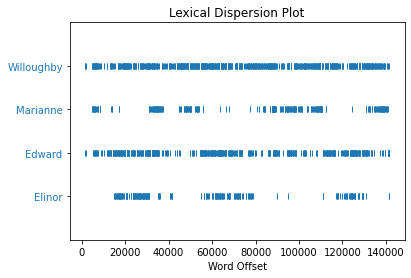

In [59]:
# Your code goes here
text2.dispersion_plot(["Elinor", "Edward", "Marianne", "Willoughby"])

d. The first sentence of text3 is provided to you in the variable sent3. The index of *the* in sent3 is 1, because sent3[1] gives us 'the'. What are the indexes of the two other occurrences of this word in sent3?

In [60]:
# Your code goes here
print(sent3)
print([idx for idx, word in enumerate(sent3) if word == 'the'])

['In', 'the', 'beginning', 'God', 'created', 'the', 'heaven', 'and', 'the', 'earth', '.']
[1, 5, 8]


e. Find all the four-letter words in the Chat Corpus (text5). With the help of a frequency distribution (FreqDist), show these words in decreasing order of frequency.



In [62]:
# Your code goes here
import re
fd = FreqDist(w.lower() for w in text5 
              if len(w)==4 and re.match(r"[a-zA-Z]{4}", w))
fd.most_common(10)

[('part', 1022),
 ('join', 1021),
 ('that', 284),
 ('what', 201),
 ('here', 185),
 ('have', 171),
 ('like', 160),
 ('with', 154),
 ('chat', 146),
 ('your', 142)]

f. Print all the uppercase words in Monty Python and the Holy Grail (text6)?

In [64]:
# Your code goes here
[word for word in text6.tokens if word.isupper()][:10]

['SCENE',
 'KING',
 'ARTHUR',
 'SOLDIER',
 'ARTHUR',
 'I',
 'SOLDIER',
 'ARTHUR',
 'I',
 'I']

g. Write expressions for finding all words in text6 that meet the conditions listed below. The result should be in the form of a list of words

* Ending in ise
* Containing the letter z
* Containing the sequence of letters pt
* Having all lowercase letters except for an initial capital (i.e., titlecase)


In [67]:
# Your code goes here

# Ending in ise
print([word for word in text6.tokens if word[-3:] == 'ise'])

# Containing the letter z
print([word for word in text6.tokens if 'z' in word])

# Containing the sequence of letters pt
print([word for word in text6.tokens if 'pt' in word][:10])

# Having all lowercase letters except for an initial capital (i.e., titlecase)
print([word for word in text6.tokens if word.istitle()][:10])

['wise', 'wise', 'apologise', 'surprise', 'surprise', 'surprise', 'noise', 'surprise']
['zone', 'amazes', 'Fetchez', 'Fetchez', 'zoop', 'zoo', 'zhiv', 'frozen', 'zoosh']
['empty', 'aptly', 'Thpppppt', 'Thppt', 'Thppt', 'empty', 'Thppppt', 'temptress', 'temptation', 'ptoo']
['Whoa', 'Halt', 'Who', 'It', 'I', 'Arthur', 'Uther', 'Pendragon', 'Camelot', 'King']


## Corpora

Practical work in Natural Language Processing typically uses large bodies of linguistic data, or corpora.

### Accessing Text Corpora
A text corpus is a large body of text. Many corpora are designed to contain a careful balance of material in one or more genres. 

We look at various pre-defined texts that we accessed by typing ```from nltk.book import *```. However, since we want to be able to work with other texts, we now examine a variety of text corpora. 

NLTK provides access to a number of well known Corpora as well as allows us to build our own. We will examine the Corpora that are made availabe to us first.

**Gutenberg Corpus**

NLTK includes a small selection of texts from the Project Gutenberg electronic text archive, which contains some 25,000 free electronic books, hosted at http://www.gutenberg.org/. which can be accessed as follows

In [69]:
from nltk.corpus import gutenberg

we can find the list of ducuments included in this corpus as follows:

In [70]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [71]:
print(type(gutenberg))

<class 'nltk.corpus.reader.plaintext.PlaintextCorpusReader'>


The Corpus is an instance of the class ```PlaintextCorpusReader```

To be able to use the ```concordance``` method we saw earlier, we need to load the words as a ```Text``` object as follows:

In [72]:
emma = gutenberg.words(gutenberg.fileids()[0])
emma_text = nltk.Text(emma)

In [73]:
emma_text.concordance("dry")

Displaying 4 of 4 matches:
st the right weather for him , fine , dry , settled weather . We shall enjoy hi
never dusty , and now it is perfectly dry . Come on a donkey , however , if you
 friend . Under that peculiar sort of dry , blunt manner , I know you have the 
hat they ought to be . I hope it is a dry situation , and that her health will 


### Exercise 2

Find the longest word in the file *chesterton-thursday.txt*

In [74]:
chesterton_thursday = gutenberg.words('chesterton-thursday.txt')
longest = ''
for word in chesterton_thursday:
  if len(word) > len(longest):
    longest = word
longest

'undenominational'

NLTK offers a number of of Corpora, worth mentioning are the following:

package name | Corpus name 
--- | --- 
webtext | Web Text 
nps_chat | Instant messaging sessions 
brown | Brown Corpus 
reuters | Reuters Corpus 
inaugural | Inaugural Address Corpus 




Summary of basic Corpus methods defined in NLTK

Example	| Description
--- | ---
`fileids()`	| the files of the corpus
`fileids([categories])`	| the files of the corpus corresponding to these categories 
`categories()`	| the categories of the corpus
`categories([fileids])`	| the categories of the corpus corresponding to these files
`raw()`	| the raw content of the corpus
`raw(fileids=[f1,f2,f3]) `|	the raw content of the specified files
`raw(categories=[c1,c2])` |	the raw content of the specified categories
`words()`	| the words of the whole corpus
`words(fileids=[f1,f2,f3])` |	the words of the specified fileids
`words(categories=[c1,c2])`|	the words of the specified categories
`sents()`	| the sentences of the whole corpus
`sents(fileids=[f1,f2,f3])` |	the sentences of the specified fileids
`sents(categories=[c1,c2])`	| the sentences of the specified categories
`abspath(fileid)`	| the location of the given file on disk
`encoding(fileid)`	| the encoding of the file (if known)
`open(fileid)`	| open a stream for reading the given corpus file
`root` |	if the path to the root of locally installed corpus
`readme()`	| the contents of the README file of the corpus

NLTK's built in Corpora are good for learning the concepts, but eventually, we would like to operate on our own data. 

Text data in the wild comes in many formats including: plain text files, PDF, DOCX, html, json (twitter), etc.


The Python ecosystem is rich with packages that makes it easy to access the different types of files and APIs. 

## Tokenization

For analysis and further processing, we want to break up the string into words and punctuation. This step is called tokenization, and it produces our familiar structure, a list of words and punctuation.

A sentence or data can be split into words using the method ```word_tokenize()```:

In [75]:
from nltk.tokenize import word_tokenize

text = "All work and no play makes jack a dull boy, all work and no play"
word_tokens = word_tokenize(text)
print(word_tokens)

['All', 'work', 'and', 'no', 'play', 'makes', 'jack', 'a', 'dull', 'boy', ',', 'all', 'work', 'and', 'no', 'play']


In [76]:
word_text = nltk.Text(word_tokens)
word_text.vocab().most_common(20)

[('work', 2),
 ('and', 2),
 ('no', 2),
 ('play', 2),
 ('All', 1),
 ('makes', 1),
 ('jack', 1),
 ('a', 1),
 ('dull', 1),
 ('boy', 1),
 (',', 1),
 ('all', 1)]

The same principle can be applied to sentences. Simply change the to
```sent_tokenize()``` We have added two sentences to the variable data:

In [77]:
from nltk.tokenize import sent_tokenize, word_tokenize

data = "All work and no play makes jack dull boy. All work and no play makes jack a dull boy."
sent_tokenize(data)

['All work and no play makes jack dull boy.',
 'All work and no play makes jack a dull boy.']

### Exercise 3

What is the longest word in the provided article bellow? 

In [78]:
# We grab the article HTML
from urllib import request

url = "https://www.technologyreview.com/2021/03/17/1020811/better-tech-government-pandemic-united-states/"

response = request.urlopen(url)
print(response.code)

raw = response.read().decode('utf8')
print(type(raw))
print(len(raw))

200
<class 'str'>
326986


In [79]:
# Then we parse the response
from bs4 import BeautifulSoup

parsed_text = BeautifulSoup(raw, 'html.parser').get_text()

In [81]:
# your code goes here, Hint: tokenize > cast as Text object > analyse

def find_longest_word(tokens):
  longest = ''
  for token in tokens:
    if len(token) > len(longest):
      longest = token
  return longest

tokenized_text = word_tokenize(parsed_text)

find_longest_word(tokenized_text)

'ReviewFeaturedTopicsNewslettersEventsPodcastsSign'

## Stop words
English text may contain stop words like ‘the’, ‘is’, ‘are’. Stop words can be filtered from the text to be processed. There is no universal list of stop words in NLP research, however the NLTK module contains a list of stop words. Now you will learn how to remove stop words using the NLTK. 

We start with the code from the previous section with tokenized words.



In [83]:
from nltk.corpus import stopwords
print(stopwords.words('english')[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [84]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords # We imported auxiliary corpus provided with NLTK

text = "All work and no play makes jack dull boy. All work and no play makes jack a dull boy."

stop_words = stopwords.words('english')

words = word_tokenize(text.lower())

words_filtered = [w for w in words if w not in stop_words]

print(words_filtered) # Print the filtered text

['work', 'play', 'makes', 'jack', 'dull', 'boy', '.', 'work', 'play', 'makes', 'jack', 'dull', 'boy', '.']


### Exercise 4

using the variable from `parsed_text` from Exercise 3, find the most common 10 words before and after removing the stop words

In [86]:
# Your code goes here
tokenized_text = word_tokenize(parsed_text)
tokenized_text = [word for word in tokenized_text if word.isalpha()]

top10_words_before = FreqDist(tokenized_text).most_common(10)
print([word for word, freq in top10_words_before]) # tuple unpacking

tokenized_text_filtered = [word for word in tokenized_text if word not in stop_words]
top10_words_after = FreqDist(tokenized_text_filtered).most_common(10)
print([word for word, freq in top10_words_after])

['to', 'the', 'a', 'and', 'of', 'that', 'for', 's', 'in', 'it']
['government', 'people', 'systems', 'new', 'system', 'technology', 'You', 'We', 'opens', 'Technology']


## Stemming


Stemmers

NLTK includes several off-the-shelf stemmers, and if you ever need a stemmer you should use one of these in preference to crafting your own using regular expressions, since these handle a wide range of irregular cases. The Porter and Lancaster stemmers follow their own rules for stripping affixes. 

Observe that the Porter stemmer correctly handles the word lying (mapping it to lie), while the Lancaster stemmer does not.

In [93]:
from nltk import PorterStemmer, LancasterStemmer

porter = PorterStemmer()

raw = """DENNIS: Listen, strange women lying in ponds distributing swords
 is no basis for a system of government.  Supreme executive power derives from
 a mandate from the masses, not from some farcical aquatic ceremony."""

tokens = word_tokenize(raw)

print(*[porter.stem(t) for t in tokens])

denni : listen , strang women lie in pond distribut sword is no basi for a system of govern . suprem execut power deriv from a mandat from the mass , not from some farcic aquat ceremoni .


In [92]:
lancaster = LancasterStemmer()

print(*[lancaster.stem(t) for t in tokens])

den : list , strange wom lying in pond distribut sword is no bas for a system of govern . suprem execut pow der from a mand from the mass , not from som farc aqu ceremony .


Stemming is not a well-defined process, and we typically pick the stemmer that best suits the application we have in mind. 

**NOTE:**
Stemming is an important step for traditional statistical machine learning systems, however for deep learning based methods, stemming is not used.


## Lemmatization

The WordNet lemmatizer only removes affixes if the resulting word is in its dictionary. This additional checking process makes the lemmatizer slower than the above stemmers. Notice that it doesn't handle lying, but it converts women to woman.

In [95]:
wnl = nltk.WordNetLemmatizer()
print(*[wnl.lemmatize(t) for t in tokens])

DENNIS : Listen , strange woman lying in pond distributing sword is no basis for a system of government . Supreme executive power derives from a mandate from the mass , not from some farcical aquatic ceremony .


Compare the results of stemming and lemmatization.

### Exercise 5

Read the gutenberg Corpus, tokenize it, and print the list of all wh-word types that occur. (wh-words in English are used in questions, relative clauses and exclamations: who, which, what, and so on.) Print them in order. Are any words duplicated in this list, because of the presence of case distinctions or punctuation?

In [97]:
# You code goes here
# I picked bryant-stories.txt
wh_words = ['why', 'who', 'which', 'what', 'where', 'when', 'how']
tokens = gutenberg.words('bryant-stories.txt')
wh_tokens = [token for token in tokens if token.lower() in wh_words]
print(wh_tokens[:10])

['Who', 'Who', 'Who', 'Who', 'when', 'which', 'when', 'When', 'what', 'who']


# Spacy - NLP in production

SpaCy is another open-source library for Natural Language Processing (NLP) in Python.

spaCy is designed specifically for production (not for learning the concepts) use and helps you build applications that process and “understand” large volumes of text.

The way tokenization is handled in Spacy is summerized in the following diagram:

![](https://spacy.io/tokenization-9b27c0f6fe98dcb26239eba4d3ba1f3d.svg)

In [ ]:
# upgrade spacy to the latest version
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download en_core_web_sm

In [99]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple isn't looking at buying U.K. startup for $1 billion")
print([token.text for token in doc])

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


['Apple', 'is', "n't", 'looking', 'at', 'buying', 'U.K.', 'startup', 'for', '$', '1', 'billion']


Lemmatization in Spacy

In [100]:
print([token.lemma_ for token in doc])

['Apple', 'be', 'not', 'look', 'at', 'buy', 'U.K.', 'startup', 'for', '$', '1', 'billion']


Notice the difference between the tokens and lemmas!

# WordClouds

Word clouds are a visualization technique which represent the frequency or the importance of each word. 

In [ ]:
!pip install wordcloud

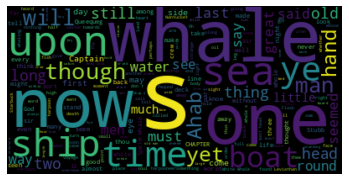

In [108]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib import pyplot as plt


test_corpus2 = " ".join(text1.tokens)


wordcloud = WordCloud(stopwords=STOPWORDS, background_color="black").generate(test_corpus2)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Exercise 6

Generate a word cloud for the book at https://www.gutenberg.org/cache/epub/19017/pg19017.txt 


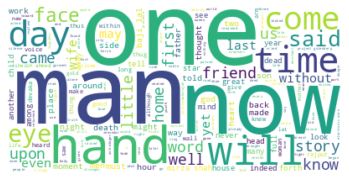

In [109]:
# Your code goes here
import urllib.request  
import re

# step 1: download the book as text
book_url = "https://www.gutenberg.org/cache/epub/19017/pg19017.txt"

with urllib.request.urlopen(book_url) as f:
   book = f.read().decode('utf-8').lower()

# step 2: tokenize and remove the irrelevant parts of the text
book = [word for word in word_tokenize(book) if word.isalpha()]


# step 3: generate and plot wordcloud 
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white")
wordcloud = wordcloud.generate(' '.join(book))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()